In [ ]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
from pandas_profiling import ProfileReport
from scipy.stats import skew, norm
from sklearn.cluster import KMeans
from IPython.display import display, HTML
%matplotlib inline
 
 
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
 
# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
CSS = """
div.cell:nth-child(30) .output {
    flex-direction: row;
}
"""
 
HTML('<style>{}</style>'.format(CSS))

In [ ]:
!ls -lrth

total 4.0K
drwxr-xr-x 1 root root 4.0K Nov  6 17:30 sample_data


In [ ]:
correlated_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/MAIL_TO_REG_STUD_136282_1177344_20200918_065944_532.csv")

FileNotFoundError: ignored

In [ ]:
correlated_data.describe()       

NameError: ignored

# Insights



1.   P1 to P6 are in the range of -1 to +1 and are likely to be correlation paramters
2.   In P7 and P9 the range of values is very short till 75% after that it increases hugely showing abnormality in data.
3. P7 to P9 are ratio paramters and we need to see where their ratio becomes more than 2.




In [ ]:
correlated_data[correlated_data.P9 > 2]

NameError: ignored

In [ ]:
## Check if features are missing
pd.DataFrame(correlated_data.isnull().sum()/len(correlated_data)*100).reset_index().rename(columns={"index": "Features", 0: "Missing %"})

NameError: ignored

In [ ]:
correlation_train=correlated_data.corr("pearson")
sns.set(font_scale=2)
fig = plt.figure(figsize = (45,32))
ax = sns.heatmap(  correlation_train     , annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)
fig.show()

NameError: ignored


# Observation

*   It is observed that P3 and P4 are highly positively correlated with correlation coefficient 0.9 and 0.7 respectively. 



In [ ]:
for each_column in correlated_data:
    print(each_column)

P1
P2
P3
P4
P5
P6
P7
P8
P9


In [ ]:
numerical_features = ", ".join([each_column for each_column in correlated_data])

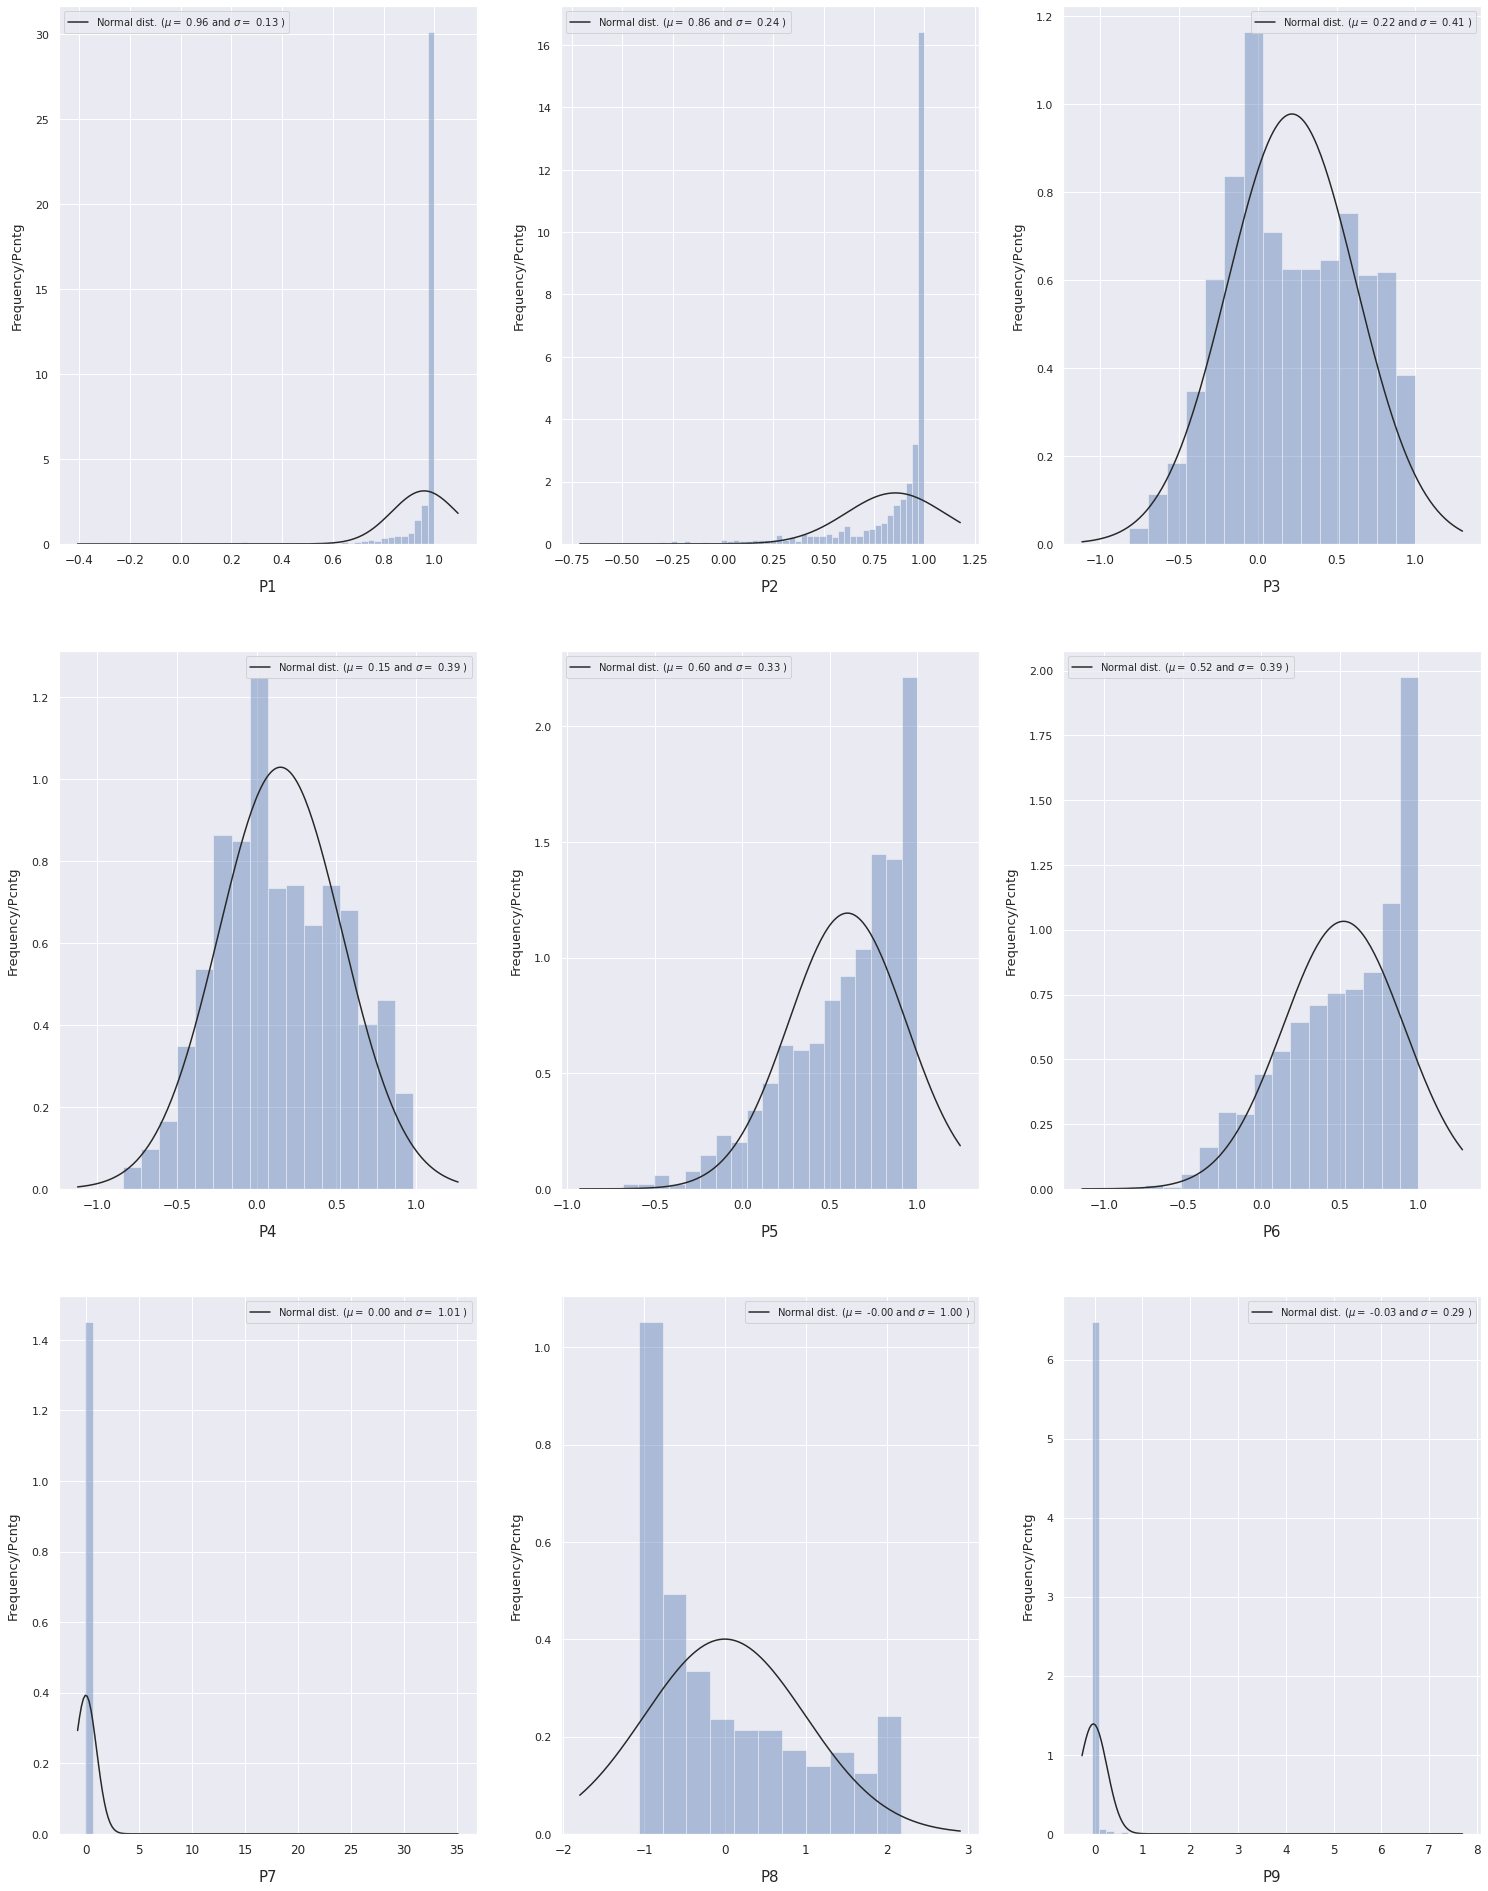

In [ ]:
#Distribution of all numerical variable

#Creating figure for plot
fig, axs = plt.subplots(ncols=4, nrows=0, figsize=(25.5, 20.5))
plt.subplots_adjust(top=1.8)
sns.color_palette("husl", 8)

#looping through each feature in order to plot it on the graph

for index, feature in enumerate(numerical_features.split(", "), 1):
        #Subplot for graph
        plt.subplot(int(len(numerical_features.split(", "))/2),3, index)
        sns.distplot(correlated_data[feature], fit=norm, kde=False)
        
        # Fitted parameters used by the function
        if correlated_data[feature].isnull().sum() < 1: #Null values are not handled by scipy.stats.norm
            (mu, sigma) = norm.fit(correlated_data[feature])
        else:
            (mu, sigma) = norm.fit(correlated_data[feature].dropna())
            
        plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best', prop={'size': 10}) #legend
        plt.xlabel(f"{feature}", size=15,labelpad=12.5)
        plt.ylabel("Frequency/Pcntg", size=13,labelpad=11.5)
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=11)

plt.show()

In [ ]:
import numpy as np

# a 2x2 matrix
A = np.array([[0,1],[-2,-3]])

# find eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(A)

# print results
for i, value in enumerate(vals):
    print("Eigenvector:", vecs[:,i], ", Eigenvalue:", value)

Eigenvector: [ 0.70710678 -0.70710678] , Eigenvalue: -1.0
Eigenvector: [-0.4472136   0.89442719] , Eigenvalue: -2.0


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

In [ ]:
adjacency_matrix = rbf_kernel(correlated_data)

In [ ]:
D = np.diag(adjacency_matrix.sum(axis=1))

In [ ]:
display(D)

array([[688.57250488,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 607.25477922,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 880.79041694, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 917.52842133,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        883.86612633,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 840.17510896]])

In [ ]:
L = D-adjacency_matrix
print(L)

[[ 6.87572505e+02 -5.80682920e-01 -7.00738598e-01 ... -6.11176743e-01
  -4.67769785e-01 -4.92313853e-01]
 [-5.80682920e-01  6.06254779e+02 -6.72888077e-01 ... -4.27536509e-01
  -2.90072944e-01 -2.73400954e-01]
 [-7.00738598e-01 -6.72888077e-01  8.79790417e+02 ... -7.81352350e-01
  -6.97549351e-01 -6.23715137e-01]
 ...
 [-6.11176743e-01 -4.27536509e-01 -7.81352350e-01 ...  9.16528421e+02
  -8.78599532e-01 -9.05942770e-01]
 [-4.67769785e-01 -2.90072944e-01 -6.97549351e-01 ... -8.78599532e-01
   8.82866126e+02 -9.23066814e-01]
 [-4.92313853e-01 -2.73400954e-01 -6.23715137e-01 ... -9.05942770e-01
  -9.23066814e-01  8.39175109e+02]]


In [ ]:
vals, vecs = np.linalg.eig(L)

In [ ]:
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

In [ ]:
vals

array([-1.89070837e-13, -1.46549439e-14,  2.04755825e+00, ...,
        9.67245150e+02,  9.67428245e+02,  9.68642290e+02])

In [ ]:
vecs.shape, vals.shape

((1163, 1163), (1163,))

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

df = pd.DataFrame(np.round(vals, 6), columns=["EigenValues"])
# values = list(range(0, 30)) + list(range(30, len(df), 50))
fig = px.line(df, x=list(range(0, len(df))), y="EigenValues", title="Eigen Values Distribution", labels={"x": "Eigen Number"})
fig.show()

In [ ]:
df[df['EigenValues'] <0.25]


,EigenValues
0,-0.0
1,-0.0


In [ ]:
df.describe()

,EigenValues
count,1163.000000
mean,834.600484
std,106.491775
min,-0.000000
25%,805.193679
50%,862.966808
75%,901.742541
max,968.642290


In [ ]:
df.quantile(.003)

EigenValues    94.33182
Name: 0.003, dtype: float64

In [ ]:
df.head(20)

,EigenValues
0,-0.000000
1,-0.000000
2,2.047558
3,52.967335
4,138.079445
5,508.591849
6,515.603609
7,526.218710
8,534.250776
9,540.301887


In [ ]:
rounded_vec = np.round(vecs, 6)

In [ ]:
rounded_vec[1]

array([ 0.0000e+00,  2.9336e-02,  8.7000e-04, ..., -9.7000e-05,
        4.5000e-05,  6.3000e-05])

In [ ]:
def get_kmeans_cluster_stats(n_clusters=5, verbose=0):
    """Function to provide stats of distribution"""
    kmeans = KMeans(n_clusters=n_clusters, verbose=verbose,random_state=123)
    kmeans.fit(vecs[:,1:n_clusters])
    cluster_labels = kmeans.labels_
    cluster_values = pd.DataFrame(cluster_labels, columns=["Cluster"])
    cluster_distribution = cluster_values.value_counts().reset_index().rename(columns={0:"Count"})
    cluster_distribution["Coverage"] = (np.round(cluster_distribution["Count"]/cluster_distribution["Count"].sum(), 4) * 100).astype(str)
    cluster_distribution["Coverage"] = cluster_distribution["Coverage"].apply(lambda x: x+"%")
    print(f"💥Sum of Squared Error for {n_clusters} clusters is {np.round(kmeans.inertia_, 6):.6f}💥")
    cluster_with_less_count = cluster_distribution[cluster_distribution["Count"] < 10]["Cluster"].tolist()
    cluster_with_less_count_string = ", ".join(str(x) for x in cluster_with_less_count[:-1]) + " and " + str(cluster_with_less_count[-1])
    print(f"💥Clusters with low cardinalities are {cluster_with_less_count_string}💥")
    for each_cluster in cluster_with_less_count:
        position_of_low_cardinality = np.argwhere(cluster_labels==each_cluster)
        position_of_low_cardinality_string = ", ".join(str(x[0]) for x in position_of_low_cardinality)
        print(f"💥Cluster {each_cluster} has {position_of_low_cardinality_string} row💥")
    print("\n💥Below is the Cluster Distribution💥\n")
    display(cluster_distribution)
    return cluster_distribution, kmeans

In [ ]:
cluster_distribution, kmeans = get_kmeans_cluster_stats(n_clusters=3,)

💥Sum of Squared Error for 3 clusters is 0.000060💥
💥Clusters with low cardinalities are 2 and 1💥
💥Cluster 2 has 555 row💥
💥Cluster 1 has 97 row💥

💥Below is the Cluster Distribution💥



,Cluster,Count,Coverage
0,0,1161,99.83%
1,2,1,0.09%
2,1,1,0.09%


In [ ]:
cluster_distribution, kmeans = get_kmeans_cluster_stats(n_clusters=4,)

NameError: ignored

In [ ]:
cluster_distribution, kmeans = get_kmeans_cluster_stats(n_clusters=5,)

💥Sum of Squared Error for 5 clusters is 0.000005💥
💥Clusters with low cardinalities are 4, 3, 2 and 1💥
💥Cluster 4 has 555 row💥
💥Cluster 3 has 20 row💥
💥Cluster 2 has 220 row💥
💥Cluster 1 has 97 row💥

💥Below is the Cluster Distribution💥



,Cluster,Count,Coverage
0,0,1159,0.9966
1,4,1,0.0009
2,3,1,0.0009
3,2,1,0.0009
4,1,1,0.0009


In [ ]:
get_kmeans_cluster_stats(n_clusters=4,verbose=0)

💥Sum of Squared Error for 4 clusters is 0.000002💥
💥Clusters with low cardinalities are 3, 2 and 1💥
💥Cluster 3 has 555, 662 row💥
💥Cluster 2 has 220 row💥
💥Cluster 1 has 97 row💥

💥Below is the Cluster Distribution💥



,Cluster,Count,Coverage
0,0,1159,0.9966
1,3,2,0.0017
2,2,1,0.0009
3,1,1,0.0009


(   Cluster  Count  Coverage
 0        0   1159    0.9966
 1        3      2    0.0017
 2        2      1    0.0009
 3        1      1    0.0009,
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=123, tol=0.0001, verbose=0))

In [ ]:
kmeans.inertia_

4.8989130054586364e-06

In [ ]:
cluster_values = pd.DataFrame(colors, columns=["Cluster"])
cluster_values.value_counts().reset_index()

,Cluster,0
0,0,1159
1,4,1
2,3,1
3,2,1
4,1,1


In [ ]:
cluster_labels = kmeans.labels_
cluster_values = pd.DataFrame(cluster_labels, columns=["Cluster"])
cluster_distribution = cluster_values.value_counts().reset_index().rename(columns={0:"Count"})
cluster_distribution

,Cluster,Count
0,0,1159
1,4,1
2,3,1
3,2,1
4,1,1


In [ ]:
cluster_distribution.columns

Index(['Cluster', 0], dtype='object')